In [5]:
# Instalando as bibliotecas necessárias para o projeto

!pip install pandas matplotlib seaborn
!pip install pyspark

In [8]:
# Gerar dados e salvar CSV com dados simulados

import pandas as pd
import numpy as np
from random import randint, choice
from datetime import datetime, timedelta

# Simulando 200 clientes
np.random.seed(42)
clientes = []
for i in range(200):
    freq = randint(1, 15)
    total_gasto = round(np.random.uniform(50, 5000), 2)
    categoria = choice(['Eletrônicos', 'Moda', 'Casa', 'Beleza', 'Livros'])
    dias_ultima = randint(0, 60)
    compra_repetida = 'Sim' if dias_ultima <= 30 else 'Não'

    clientes.append([freq, total_gasto, categoria, dias_ultima, compra_repetida])

df = pd.DataFrame(clientes, columns=[
    'Frequencia_Compras',
    'Valor_Total_Gasto',
    'Categoria_Mais_Comprada',
    'Dias_Desde_Ultima_Compra',
    'Compra_Repetida_30_dias'
])

# Salvar CSV
df.to_csv('clientes_compras.csv', index=False)
df.head()


,Frequencia_Compras,Valor_Total_Gasto,Categoria_Mais_Comprada,Dias_Desde_Ultima_Compra,Compra_Repetida_30_dias
0,4,1903.97,Beleza,37,Não
1,8,4756.04,Beleza,39,Não
2,10,3673.37,Moda,4,Sim
3,11,3013.36,Livros,57,Não
4,10,822.29,Beleza,30,Sim


       Frequencia_Compras  Valor_Total_Gasto  Dias_Desde_Ultima_Compra
count          200.000000         200.000000                200.000000
mean             8.465000        2445.830700                 31.055000
std              4.485462        1459.712741                 17.544258
min              1.000000          77.330000                  0.000000
25%              4.000000        1181.482500                 17.000000
50%              9.000000        2497.710000                 31.000000
75%             13.000000        3796.457500                 47.000000
max             15.000000        4935.090000                 60.000000
Compra_Repetida_30_dias
Sim    100
Não    100
Name: count, dtype: int64


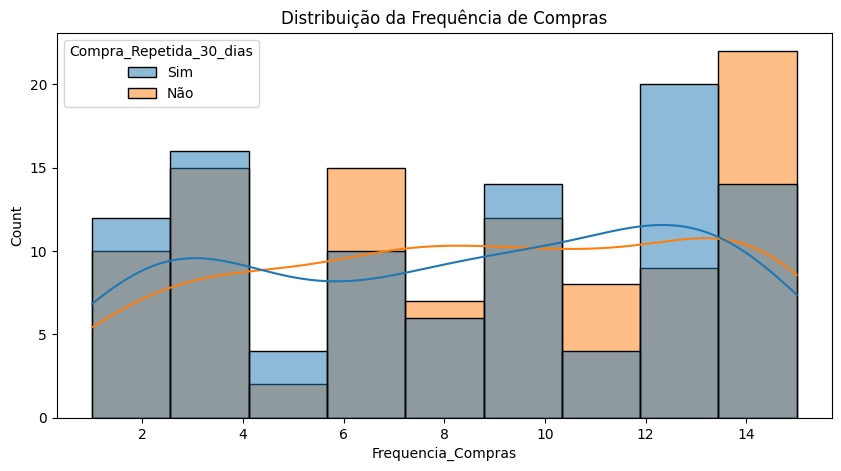

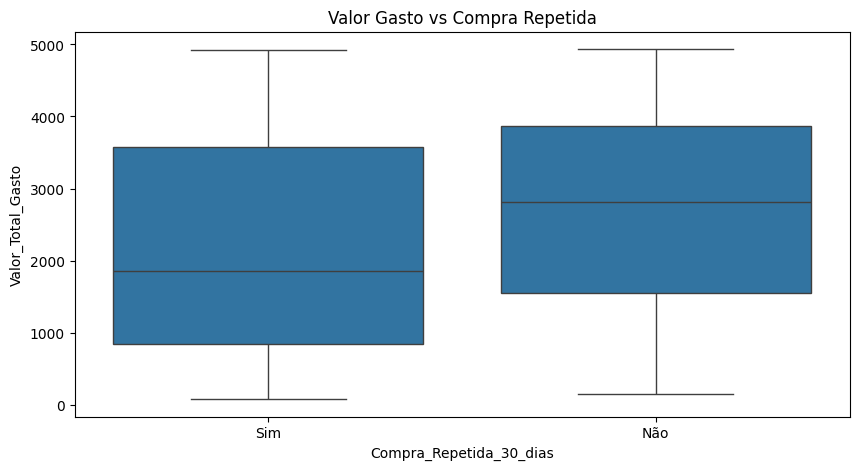

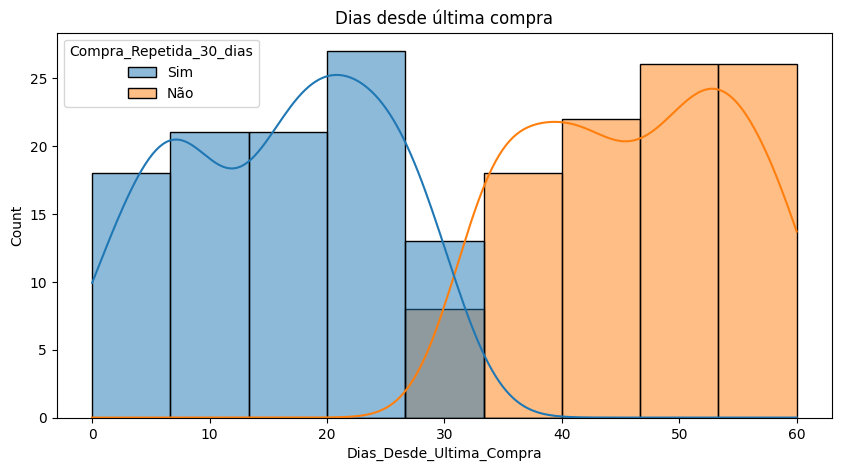

In [7]:
# Análise com Pandas + Gráficos

import seaborn as sns
import matplotlib.pyplot as plt

# Carregar
df = pd.read_csv('clientes_compras.csv')

# Estatísticas iniciais
print(df.describe())
print(df['Compra_Repetida_30_dias'].value_counts())

# Gráfico 1: Histograma de frequência de compras
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Frequencia_Compras', hue='Compra_Repetida_30_dias', kde=True)
plt.title('Distribuição da Frequência de Compras')
plt.show()

# Gráfico 2: Valor total gasto por classe de resposta
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Compra_Repetida_30_dias', y='Valor_Total_Gasto')
plt.title('Valor Gasto vs Compra Repetida')
plt.show()

# Gráfico 3: Dias desde última compra
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Dias_Desde_Ultima_Compra', hue='Compra_Repetida_30_dias', kde=True)
plt.title('Dias desde última compra')
plt.show()


In [6]:
# PySpark [EXTRA]

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Compras").getOrCreate()
df_spark = spark.read.csv("clientes_compras.csv", header=True, inferSchema=True)
df_spark.show(5)
df_spark.printSchema()


+------------------+-----------------+-----------------------+------------------------+-----------------------+
|Frequencia_Compras|Valor_Total_Gasto|Categoria_Mais_Comprada|Dias_Desde_Ultima_Compra|Compra_Repetida_30_dias|
+------------------+-----------------+-----------------------+------------------------+-----------------------+
|                14|          1903.97|                 Livros|                       9|                    Sim|
|                13|          4756.04|                   Moda|                      32|                    Não|
|                 7|          3673.37|            Eletrônicos|                      21|                    Sim|
|                 9|          3013.36|                   Casa|                      26|                    Sim|
|                15|           822.29|            Eletrônicos|                      43|                    Não|
+------------------+-----------------+-----------------------+------------------------+-----------------

<Axes: xlabel='Frequencia_Compras', ylabel='Count'>

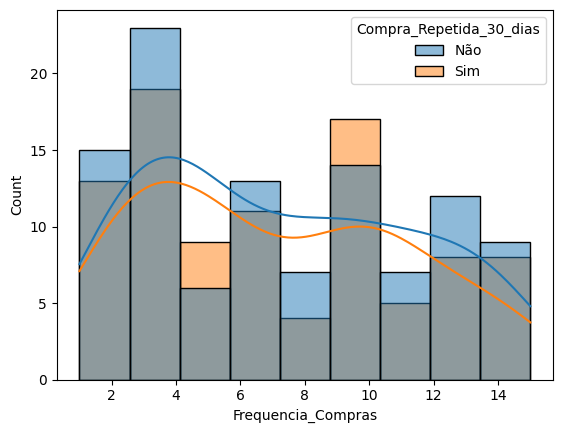

In [9]:
# GRÁFICO 01

sns.histplot(data=df, x='Frequencia_Compras', hue='Compra_Repetida_30_dias', kde=True)

<Axes: xlabel='Compra_Repetida_30_dias', ylabel='Valor_Total_Gasto'>

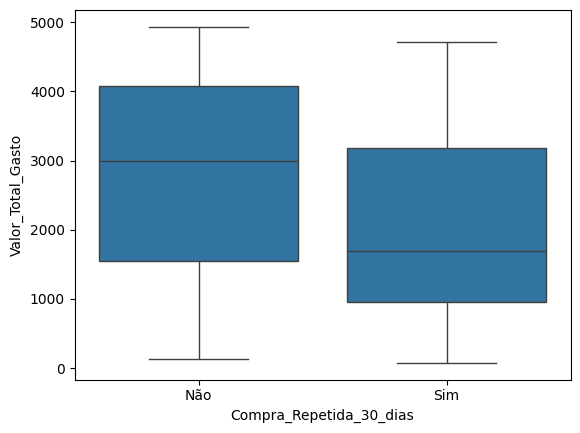

In [10]:
# GRÁFICO 02

sns.boxplot(data=df, x='Compra_Repetida_30_dias', y='Valor_Total_Gasto')

<Axes: xlabel='Dias_Desde_Ultima_Compra', ylabel='Count'>

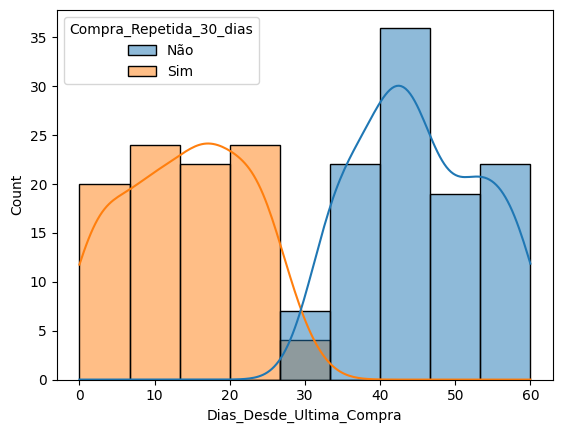

In [11]:
# GRÁFICO 03

sns.histplot(data=df, x='Dias_Desde_Ultima_Compra', hue='Compra_Repetida_30_dias', kde=True)